<h1 style="text-align:center;">Identifying patterns of videogames success using historical sales data</h1>

## Project overview

This project analyzes historical videogame sales, reviews, platforms, genres, and ESRB ratings to identify factors associated with commercial performance. The objective is to determine wich variables influence a game's market outcomes in order to support data-driven decisions in title selection and marketing strategy. The analysis is based on data available up to 2016, simulating plannig for the 2017 sales period.

## Initialization and data inspection plan
The dataset will be loaded and reviewed to verify structure, data types, completeness, and consistency. This step inlcudes checking datasets dimensions, validating variables formats, identifying and handling missing values, detecting duplicate records, and reviewing categorical and numerical fields for potential issues. These checks ensure the data is suitable for exploratory analysis, and hypothesis testing.

After preprocessing, exploratory analysis will be conducted to identify patterns in sales, platforms, genres, and reviews. The analysis will focus on market trends relevant to 2017, including platform dynamics, regional differences, and factors associated with commercial performance. Statistical hypothesis testing will be applied to evaluate differences in user ratings across platforms and genres. The project will conclude with synthesis of findings to support data-driven decisions on game selection and marketing strategy.

## 1. Load and inspect the dataset

### 1.1. Load requires libraries

In [1]:
# load requires libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import re
from functools import reduce
import unicodedata
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import ipywidgets as widgets
from IPython.display import display, clear_output

### 1.2. Load dataset

In [2]:
df_games = pd.read_csv('datasets/games.csv', sep = ',')

### 1.3. Inspect dataset structure

In [3]:
df_games.info()

<class 'pandas.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  str    
 1   Platform         16715 non-null  str    
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  str    
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  str    
 10  Rating           9949 non-null   str    
dtypes: float64(6), str(5)
memory usage: 1.4 MB


In [4]:
display(df_games.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
print(df_games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='str')


In [6]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


The dataset includes 16,715 rows and 11 columns, providing sufficient observations to support trend analysis and hypothesis testing. Numeric variables represents sales and critics scores, while categorical variables capture platforms, genres, user scores, and ESRB ratings, which are central to market segmentation and performance analysis. Missing values in release year, critic score, user score, and rating will require cleaning to avoid bias in temporal trends, review-based analyses, and regional comparisons.


## 2. Data preprocessing

### 2.1. column name normalization and hangling of duplicates and missing data

In [7]:
df_games.columns = df_games.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='str')


In [9]:
df_games.info()

<class 'pandas.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  str    
 1   platform         16715 non-null  str    
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  str    
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  str    
 10  rating           9949 non-null   str    
dtypes: float64(6), str(5)
memory usage: 1.4 MB


In [10]:
display(df_games[df_games['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
df_games  = df_games.drop(index = [659,14244])

In [12]:
df_games.info()

<class 'pandas.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  str    
 1   platform         16713 non-null  str    
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  str    
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  str    
 10  rating           9949 non-null   str    
dtypes: float64(6), str(5)
memory usage: 1.5 MB


When inspecting the column names, inconsistent capitalization is observed. To ensure consistency and avoid dowstream issues in indexing and transformations, all column names will be converted to lowercase, spaces will be removed, and words will be separated using underscores.

Two missing values are found in the name column. After inspection, these rows are found to also lack critic score, user score, and rating information. As they provide limited analytical value, they are removed from the dataset.

In [13]:
print(df_games.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


In [14]:
print("Number of entries marked as tbd per column")
for obj in df_games:
    print(obj, len(df_games[df_games[obj] == 'tbd']))

Number of entries marked as tbd per column
name 0
platform 0
year_of_release 0
genre 0
na_sales 0
eu_sales 0
jp_sales 0
other_sales 0
critic_score 0
user_score 2424
rating 0


The only column containing TBD (to be determined) values is user_score. These entries will not be processed at this stage and will be addressed later after examining the statistical distribution of this column.

It will be changed the type of the column year_of_release from float to Int64, since there is absent values.

In [15]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

The year_of_release column contains only integer values and missing entries. Although it is stored as float64, it was converted to the Int64 type to preserve missing values while maintaining an integer representation.

In [16]:
print("Number of duplicates rows: " + str(df_games.duplicated().sum()), "\n")

print('Number of duplicate values per column (excluding NaN):')
for col in df_games.columns:
    print(col, df_games[col].dropna().duplicated().sum())

print()

print('Number of duplicate rows based on name, platform, year_of_release, and genre:', df_games.duplicated(
        subset=['name', 'platform', 'year_of_release', 'genre']).sum())

print('\nRows duplicated based on name, platform, year_of_release, and genre:')

display(df_games[df_games.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'], keep=False )])

Number of duplicates rows: 0 

Number of duplicate values per column (excluding NaN):
name 5154
platform 16682
year_of_release 16407
genre 16701
na_sales 16311
eu_sales 16406
jp_sales 16469
other_sales 16558
critic_score 8055
user_score 9918
rating 9941

Number of duplicate rows based on name, platform, year_of_release, and genre: 1

Rows duplicated based on name, platform, year_of_release, and genre:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [17]:
duplicated_idx = df_games[df_games.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'], keep=False )].index.tolist()
print(duplicated_idx)

[604, 16230]


In [18]:
#It be deleted the row with the index 16230, but before that, the value of eu_sales will be added to the row with index 604
df_games.loc[duplicated_idx[0], 'eu_sales'] += df_games.loc[duplicated_idx[1], 'eu_sales']
df_games = df_games.drop(index=duplicated_idx[1])

In [19]:
print(df_games.loc[duplicated_idx[0]])

name               Madden NFL 13
platform                     PS3
year_of_release             2012
genre                     Sports
na_sales                    2.11
eu_sales                    0.23
jp_sales                     0.0
other_sales                 0.23
critic_score                83.0
user_score                   5.5
rating                         E
Name: 604, dtype: object


In [20]:
print('Number of duplicate rows based on name, platform, and year_of_release :', df_games.duplicated(
        subset=['name', 'platform', 'year_of_release']).sum())

Number of duplicate rows based on name, platform, and year_of_release : 0


There is no entirely rows of duplicates values, but there is one duplicate value in the columns 'name', 'platform', 'year_of_release', 'genre', after delete this duplicate item, there is no other duplicate value. It also was checked for only the columns 'name', 'platform', 'year_of_release', and no duplicated values were found.

In [21]:
display(df_games[df_games.duplicated(subset=['name', 'platform'], keep=False )].head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T


It can be observed that duplicated appear when checking the name and platform columns together; however, these entries has different release years. Conversely, some duplicates appear when checking name and years of release, but they correspond to different platforms. Therefore, it is not necessary to remove any rows in this case.

In [22]:
def normalize_text(s):
    # Handle missing values explicitly to avoid errors during normalization
    if pd.isna(s):
        return s

    # Decompose Unicode characters and strip non-ASCII symbols
    # to obtain a normalized, accent-free representation
    s = unicodedata.normalize('NFKD', s)
    s = s.encode('ascii', 'ignore').decode('utf-8')

    return s

In [23]:
# Create a canonical version of game names to ensure consistent text comparison.
# The process removes accents and special characters, standardizes casing,
# and replaces word separators with underscores.
df_games['canonical_name'] = (
    df_games['name']
        .map(normalize_text)
        .str.lower()
        .str.strip()
        .str.replace(r'[–—\-\/]', ' ', regex=True)
        .str.replace(r'[^a-z0-9\s]', '', regex=True)
        .str.replace(r'\s+', ' ', regex=True)
        .str.replace(' ', '_')
)

In [24]:
display(df_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,canonical_name
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,wii_sports
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,super_mario_bros
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,mario_kart_wii
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,wii_sports_resort
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,pokemon_red_pokemon_blue


In [25]:
# Identify any remaining non-alphanumeric symbols after name normalization
symbols_name = set(
    re.findall(r'[^a-zA-Z0-9\s]', ''.join(df_games['canonical_name'].dropna()))
)

print(symbols_name)

{'_'}


In [26]:
# Check for duplicate data at different levels:
# full-row duplicates, column-level duplicates, and logical duplicates
# based on identifying attributes.
print("Number of duplicates rows: " + str(df_games.duplicated().sum()), "\n")

print('Number of duplicate values per column (excluding NaN):')
for col in df_games.columns:
    print(col, df_games[col].dropna().duplicated().sum())

print()

# Identify potential logical duplicates using a composite key
print(
    'Number of duplicate rows based on name, platform, year_of_release, and genre:',
    df_games.duplicated(subset=['canonical_name', 'platform', 'year_of_release', 'genre']).sum()
)

print('\nRows duplicated based on name, platform, year_of_release, and genre:')
print(
    df_games[
        df_games.duplicated(
            subset=['canonical_name', 'platform', 'year_of_release'],
            keep=False
        )
    ]
)

Number of duplicates rows: 0 

Number of duplicate values per column (excluding NaN):
name 5153
platform 16681
year_of_release 16406
genre 16700
na_sales 16310
eu_sales 16405
jp_sales 16468
other_sales 16557
critic_score 8054
user_score 9917
rating 9940
canonical_name 5182

Number of duplicate rows based on name, platform, year_of_release, and genre: 0

Rows duplicated based on name, platform, year_of_release, and genre:
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, canonical_name]
Index: []


In [27]:
symbols_name = set(
    re.findall(r'[^a-zA-Z0-9\s]', ''.join(df_games['platform'].dropna()))
)

print(symbols_name)

set()


In [28]:
df_games['platform'] = df_games['platform'].str.strip().str.lower()

In [29]:
symbols_name = set(
    re.findall(r'[^a-zA-Z0-9\s]', ''.join(df_games['genre'].dropna()))
)

print(symbols_name)

{'-'}


In [30]:
df_games['genre'] = df_games['genre'].str.strip().str.lower().str.replace('-', '_')

A new column named canonical_name was created by normalizing the values in the name column. Titles were converted to lowercase, accents and special caracters were removed, spaces were replaced with underscores, and punctuation was stripped. For example, Mahou Sensei Negima!? Neo-Pactio Fight!! was transformed into mahou_sensei_negima_neo_pactio_fight.

The platform and genre columns were also normalized using the same formatting rules, but no additional columns were created; the existing columns were updated in place.

In [31]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors = 'coerce')

The user_score column was converted to float64. Missing values and TDB entries were converted to NaN (absent values) because there are 2,424 TBD cases, and imputing them with the mean or median could distort the distribution and bias statistical results, given that the effective sample size for valid scores is 8,137.

In [32]:
print(df_games['rating'].unique())

<StringArray>
['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']
Length: 9, dtype: str


In [33]:
df_games['rating'] = df_games['rating'].fillna('unknown')

Missing values in the rating column were replaced with 'unknown' to preserve rows while distinguishing unclassified entries.

In [34]:
df_games.info()

<class 'pandas.DataFrame'>
Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  str    
 1   platform         16712 non-null  str    
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  str    
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  str    
 11  canonical_name   16712 non-null  str    
dtypes: Int64(1), float64(6), str(5)
memory usage: 2.2 MB


Computation of the total sells in a new column

In [35]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'canonical_name'],
      dtype='str')

### 2.2. Enrich the data

In [36]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

In [37]:
display(df_games.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,canonical_name,total_sales
14882,Touch Shot! Love Application,ps3,2012,adventure,0.00,0.00,0.03,0.00,NaN,NaN,unknown,touch_shot_love_application,0.03
5782,Jonah Lomu Rugby Challenge,x360,2011,sports,0.09,0.19,0.00,0.03,73.0,6.0,E,jonah_lomu_rugby_challenge,0.31
12446,Tecmo Classic Arcade,xb,2005,misc,0.05,0.01,0.00,0.00,55.0,NaN,E,tecmo_classic_arcade,0.06
2472,Ben 10: Protector of Earth,ps2,2007,action,0.09,0.00,0.00,0.74,NaN,7.6,E10+,ben_10_protector_of_earth,0.83
3693,Crash Tag Team Racing,ps2,2005,racing,0.27,0.21,0.00,0.07,66.0,7.0,E10+,crash_tag_team_racing,0.55


In [38]:
df_games['year_of_release'].describe()

count        16443.0
mean     2006.485921
std         5.875546
min           1980.0
25%           2003.0
50%           2007.0
75%           2010.0
max           2016.0
Name: year_of_release, dtype: Float64

A new column named total_sales was created to store total global sales per row, computed as the sum of sales in North America, Europe, Japan, and other regions.

## 3. Exploratory data analysis

### 3.1. Game releases over time

In [39]:
print(
    "Release year range:",
    np.min(pd.Series(df_games['year_of_release'].unique()).dropna().sort_values()),
    "-",
    np.max(pd.Series(df_games['year_of_release'].unique()).dropna().sort_values())
)

Release year range: 1980 - 2016


In [40]:
def setup_minor_ticks(
    ax,
    x_minor_divisions=4, y_minor_divisions=2,
    major=(14, 2.5), minor=(8, 1.2),
    sides=dict(top=True, right=True, bottom=True, left=True),
    direction_top='in',
    direction_bottom='out',
    direction_left='in',
    direction_right='in'
):
    # Enable and configure minor tick locators for both axes
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator(x_minor_divisions))
    ax.yaxis.set_minor_locator(AutoMinorLocator(y_minor_divisions))

    # Unpack major and minor tick styling parameters
    major_length, major_width = major
    minor_length, minor_width = minor

    # Apply tick styling for all sides and levels (major and minor)
    # to allow fine-grained, reusable control over axis appearance
    ax.tick_params(axis='x', which='major', length=major_length, width=major_width,
                   direction=direction_top, top=sides['top'])
    ax.tick_params(axis='x', which='major', length=major_length, width=major_width,
                   direction=direction_bottom, bottom=sides['bottom'])

    ax.tick_params(axis='y', which='major', length=major_length, width=major_width,
                   direction=direction_left, left=sides['left'])
    ax.tick_params(axis='y', which='major', length=major_length, width=major_width,
                   direction=direction_right, right=sides['right'])

    ax.tick_params(axis='x', which='minor', length=minor_length, width=minor_width,
                   direction=direction_top, top=sides['top'])
    ax.tick_params(axis='x', which='minor', length=minor_length, width=minor_width,
                   direction=direction_bottom, bottom=sides['bottom'])

    ax.tick_params(axis='y', which='minor', length=minor_length, width=minor_width,
                   direction=direction_left, left=sides['left'])
    ax.tick_params(axis='y', which='minor', length=minor_length, width=minor_width,
                   direction=direction_right, right=sides['right'])

In [41]:
print(df_games['year_of_release'].dropna().astype('int').value_counts().sort_index().describe())

count      37.000000
mean      444.405405
std       451.591535
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: count, dtype: float64


In [42]:
print(df_games['year_of_release'].dropna().astype('int').value_counts().sort_index())

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: int64


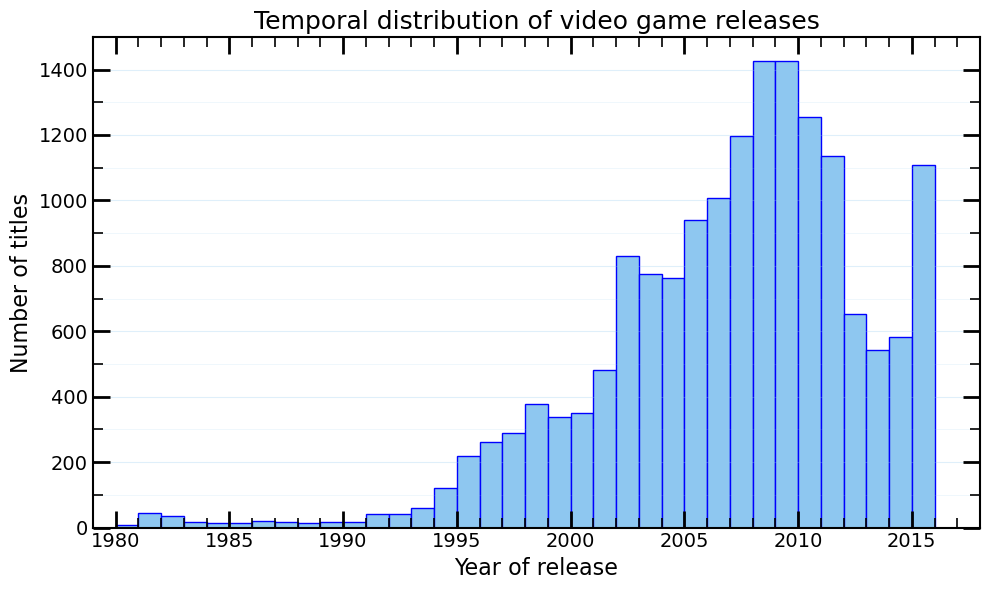

In [43]:
# Build integer-year bins to plot one bar per release year
x = df_games['year_of_release'].dropna().astype(int)
bins = np.arange(x.min(), x.max() + 1, 1)

# Histogram of releases over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(x, bins=bins, edgecolor='blue', alpha=1, linewidth=1.0, color='#8EC7F0')

# Axis labels and title for readability in the report
ax.set_xlabel('Year of release', fontsize=16)
ax.set_ylabel('Number of titles', fontsize=16)
ax.set_title('Temporal distribution of video game releases', fontsize=18)

# Consistent axis framing
for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_linewidth(1.5)

ax.tick_params(labelsize=14)

# Reduce x-axis clutter by showing ticks every 5 years
step = 5
ax.set_xticks(np.arange(x.min(), x.max() + 1, step))
ax.set_xlim(x.min() - 1, x.max() + 2)

# Subtle y-axis gridlines to support comparisons
ax.grid(axis='y', which='major', linewidth=0.8, alpha=0.28, color='#8EC7F0')
ax.grid(axis='y', which='minor', linewidth=0.5, alpha=0.20, color='#8EC7F0')

# Minor ticks and tick styling for a consistent plotting theme
setup_minor_ticks(
    ax,
    x_minor_divisions=5,
    y_minor_divisions=2,
    major=(12, 2),
    minor=(7, 1.2),
    sides=dict(top=True, right=True, bottom=True, left=True),
    direction_top='in',
    direction_bottom='in',
    direction_left='in',
    direction_right='in'
)

plt.tight_layout()
plt.show()

In [44]:
print(df_games[df_games['year_of_release'] == 2009]['year_of_release'].count())

1426


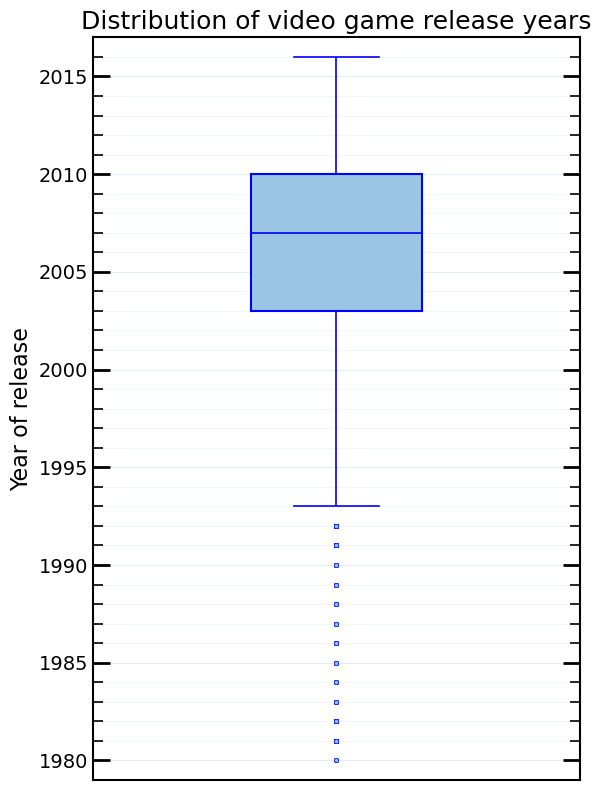

In [45]:
# Extract release years as integers to analyze temporal dispersion
years = df_games['year_of_release'].dropna().astype(int)

# Single-variable boxplot to summarize the distribution of release years
fig, ax = plt.subplots(figsize=(6, 8))

sns.boxplot(
    y=years, ax=ax, width=0.35, color='#8EC7F0', linewidth=1.5,
    showfliers=True,
    boxprops=dict(edgecolor='blue'),
    whiskerprops=dict(color='blue', linewidth=1.2),
    capprops=dict(color='blue', linewidth=1.2),
    medianprops=dict(color='blue', linewidth=1.2),
    flierprops=dict(
        marker='o',
        markerfacecolor='#8EC7F0',
        markeredgecolor='blue',
        markersize=3,
        alpha=0.6,
        markeredgewidth=0.5
    )
)

# Axis labels and title for report readability
ax.set_ylabel('Year of release', fontsize=16)
ax.set_title('Distribution of video game release years', fontsize=18)
ax.set_xlabel('')

# Match axis framing with the histogram for visual consistency
for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_linewidth(1.5)

ax.tick_params(labelsize=14)

# Use fixed year spacing to highlight temporal spread and outliers
ymin, ymax = years.min(), years.max()
ax.set_ylim(ymin - 1, ymax + 1)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))

# Subtle gridlines to support year comparison
ax.grid(axis='y', which='major', linewidth=0.8, alpha=0.28, color='#8EC7F0')
ax.grid(axis='y', which='minor', linewidth=0.5, alpha=0.20, color='#8EC7F0')

# Apply the shared tick styling helper for consistency across figures
setup_minor_ticks(
    ax,
    x_minor_divisions=2,
    y_minor_divisions=5,
    major=(12, 2),
    minor=(7, 1.2),
    sides=dict(top=False, right=True, bottom=False, left=True),
    direction_top='in',
    direction_bottom='in',
    direction_left='in',
    direction_right='in'
)

plt.tight_layout()
plt.show()

In [46]:
years.describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

#### 3.1.1. Release year classification into temporal eras

In [47]:
# Assign release years to broad temporal eras for grouped analysis
def era_group(year):
    if pd.isna(year):
        return 'unknown'
    elif year < 2000:
        return 'retro'
    elif year >= 2000 and year < 2010:
        return 'modern'
    else:
        return 'recent'

In [48]:
df_games['era_group'] = df_games['year_of_release'].apply(era_group)

In [49]:
display(df_games[['year_of_release','era_group']].head())

,year_of_release,era_group
0,2006,modern
1,1985,retro
2,2008,modern
3,2009,modern
4,1996,retro


In [50]:
series_categorized_games = df_games[df_games['era_group'] != 'unknown'].groupby('era_group')['name'].count().sort_values(ascending = True).rename('total_games_by_category')

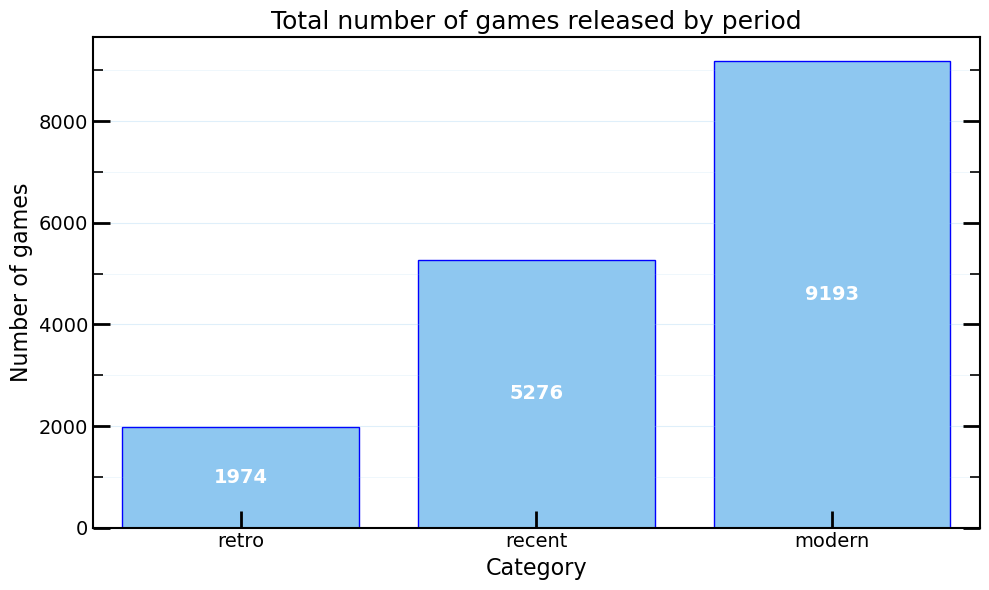

In [51]:
# Bar chart of game counts by predefined release periods
x = series_categorized_games  # index=categories, values=counts

fig, ax = plt.subplots(figsize=(10, 6))

#control over bar styling
bars = ax.bar(
    x.index,
    x.values,
    edgecolor='blue',
    linewidth=1.0,
    color='#8EC7F0',
    alpha=1
)

# Axis labels and title for report clarity
ax.set_xlabel('Category', fontsize=16)
ax.set_ylabel('Number of games', fontsize=16)
ax.set_title('Total number of games released by period', fontsize=18)

# Consistent axis framing
for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_linewidth(1.5)

ax.tick_params(labelsize=14)
ax.tick_params(axis='x', rotation=0)

# Subtle y-axis gridlines to support comparison across categories
ax.grid(axis='y', which='major', linewidth=0.8, alpha=0.28, color='#8EC7F0')
ax.grid(axis='y', which='minor', linewidth=0.5, alpha=0.20, color='#8EC7F0')

# Minor ticks on Y improve readability for discrete counts
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Apply shared tick styling helper for visual consistency
setup_minor_ticks(
    ax,
    x_minor_divisions=1,
    y_minor_divisions=2,
    major=(12, 2),
    minor=(7, 1.2),
    sides=dict(top=False, right=True, bottom=True, left=True),
    direction_top='in',
    direction_bottom='in',
    direction_left='in',
    direction_right='in'
)

# Annotate counts directly inside each bar
for p in bars:
    h = p.get_height()
    ax.annotate(
        f'{int(h)}',
        (p.get_x() + p.get_width() / 2, h / 2),
        ha='center',
        va='center',
        color='white',
        fontsize=14,
        fontweight='bold'
    )

# Tight x-limits to match categorical layout
ax.set_xlim(-0.5, len(x) - 0.5)

plt.tight_layout()
plt.show()

The highest number of video game releases occurred in 2008 (1427 games) and 2009 (1426 games). The average number of releases per year is 444, while the median is 338, indicading that most years have fewer releases than the peak years.

The 50% of annual release counts lies between 36 (Q1) and 762 (Q3), resulting in an interquartile range of 726 games per year. The minimum observed value is 9 games per year, and the maximum is 1427, showing substantial variation in in production volume across years.

When grouping release years into periods, the dataset contains 1974 retro games (before 2000), 5276 moder games (2000-2009), and 9193 recent games (2010+). This means that 88% of all games in the dataset were released after 2000, while only 12% belong to the retro period.

### 3.2. Platforms sales dynamics and lifecycle over time

In [52]:
series_ordered_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).rename('total_sales_sum')

In [53]:
print(series_ordered_sales)
series_ordered_sales.describe()

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
3ds      259.00
xb       257.74
gb       255.46
nes      251.05
n64      218.68
snes     200.04
gc       198.93
xone     159.32
2600      96.98
wiiu      82.19
psv       54.07
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: total_sales_sum, dtype: float64


count      31.000000
mean      287.525484
std       348.220029
min         0.030000
25%        22.150000
50%       200.040000
75%       304.095000
max      1255.770000
Name: total_sales_sum, dtype: float64

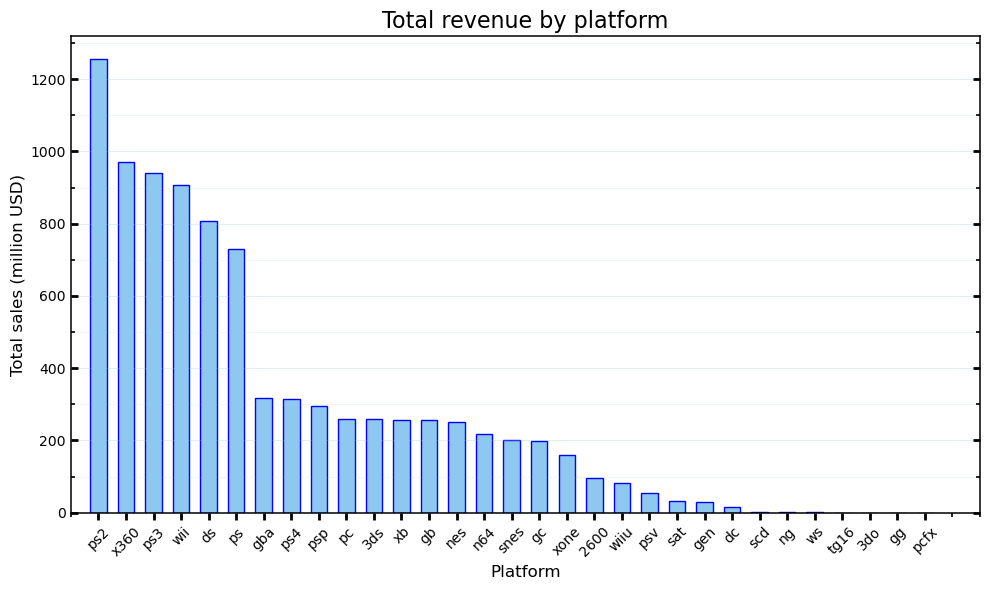

In [54]:
# Bar chart showing total sales aggregated by platform
fig, ax = plt.subplots(figsize=(10, 6))

# Use Matplotlib bars for precise control over layout and styling
ax.bar(
    series_ordered_sales.index,
    series_ordered_sales.values,
    edgecolor='blue',
    width=0.6,
    linewidth=1.0,
    color='#8EC7F0',
    alpha=1
)

# Axis labels and title for report context
ax.set_xlabel('Platform', fontsize=12)
ax.set_ylabel('Total sales (million USD)', fontsize=12)
ax.set_title('Total revenue by platform', fontsize=16)

# Consistent axis framing across figures
for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_linewidth(1.1)

ax.tick_params(labelsize=10)
ax.tick_params(axis='x', rotation=45)

# Subtle y-axis gridlines to aid comparison
ax.grid(axis='y', which='major', linewidth=0.8, alpha=0.28, color='#8EC7F0')
ax.grid(axis='y', which='minor', linewidth=0.5, alpha=0.20, color='#8EC7F0')

# Minor ticks on Y improve readability for aggregated values
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Apply shared tick styling helper for visual consistency
setup_minor_ticks(
    ax,
    x_minor_divisions=1,
    y_minor_divisions=2,
    major=(5, 2),
    minor=(3, 1.2),
    sides=dict(top=False, right=True, bottom=True, left=True),
    direction_top='in',
    direction_bottom='out',
    direction_left='in',
    direction_right='in'
)

# Adjust x-limits to provide spacing for categorical labels
ax.set_xlim(-1, len(series_ordered_sales) + 1)

plt.tight_layout()
plt.show()

In [55]:
series_ordered_sales_mean = df_games.groupby('platform')['total_sales'].mean().sort_values(ascending = False).rename('total_sales_mean')

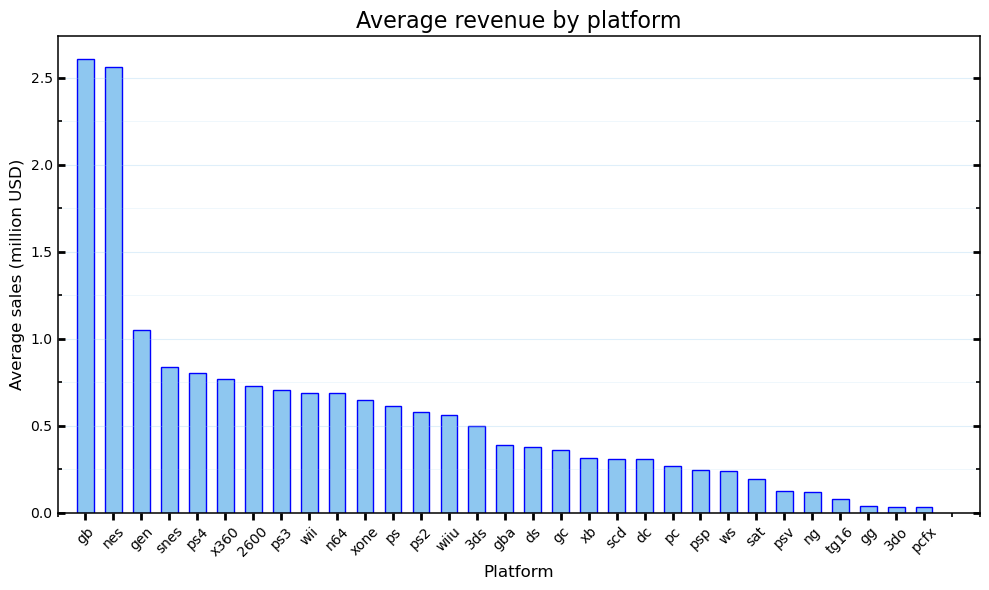

In [56]:
# Bar chart showing average sales per platform
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(
    series_ordered_sales_mean.index,
    series_ordered_sales_mean.values,
    edgecolor='blue',
    width=0.6,
    linewidth=1.0,
    color='#8EC7F0',
    alpha=1
)

# Axis labels and title to distinguish averages from totals
ax.set_xlabel('Platform', fontsize=12)
ax.set_ylabel('Average sales (million USD)', fontsize=12)
ax.set_title('Average revenue by platform', fontsize=16)

# Consistent axis framing
for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_linewidth(1.1)

ax.tick_params(labelsize=10)
ax.tick_params(axis='x', rotation=45)

# Subtle y-axis gridlines for value comparison
ax.grid(axis='y', which='major', linewidth=0.8, alpha=0.28, color='#8EC7F0')
ax.grid(axis='y', which='minor', linewidth=0.5, alpha=0.20, color='#8EC7F0')

# Minor ticks improve readability for aggregated averages
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Apply shared tick styling helper for visual consistency
setup_minor_ticks(
    ax,
    x_minor_divisions=1,
    y_minor_divisions=2,
    major=(5, 2),
    minor=(3, 1.2),
    sides=dict(top=False, right=True, bottom=True, left=True),
    direction_top='in',
    direction_bottom='out',
    direction_left='in',
    direction_right='in'
)

# Adjust x-limits to provide spacing for categorical labels
ax.set_xlim(-1, len(series_ordered_sales_mean) + 1)

plt.tight_layout()
plt.show()

In [57]:
# Compute cumulative sales share to identify the smallest set of platforms
# accounting for at least 60% of total sales
total_sales = series_ordered_sales.sum()
cumulative_share = series_ordered_sales.cumsum() / total_sales

# Select platforms up to the 60% threshold, including the first one that exceeds it
top_platforms_60 = cumulative_share[cumulative_share <= 0.6].index.tolist()
top_platforms_60.append(cumulative_share[cumulative_share > 0.6].index[0])

# Report coverage achieved by the selected platforms
covered_percentage = cumulative_share.loc[top_platforms_60[-1]] * 100

print(f'Platforms selected: {len(top_platforms_60)}')
print(f'Covered percentage of total sales: {covered_percentage:.2f}%')

top_platforms_60

Platforms selected: 6
Covered percentage of total sales: 62.95%


['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

In [58]:
print(type(top_platforms_60))

<class 'list'>


In [59]:
df_platforms_top_sales = df_games[df_games['platform'].isin(top_platforms_60)]

In [60]:
display(df_platforms_top_sales.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,canonical_name,total_sales,era_group
10218,Hasbro Family Game Night Fun Pack,wii,2011,misc,0.10,0.00,0.0,0.01,NaN,NaN,E,hasbro_family_game_night_fun_pack,0.11,recent
2493,Need for Speed: Nitro,wii,2009,racing,0.45,0.30,0.0,0.08,69.0,7.4,E10+,need_for_speed_nitro,0.83,modern
12085,Yamaha Supercross,wii,2009,racing,0.05,0.01,0.0,0.01,NaN,NaN,E,yamaha_supercross,0.07,modern
12884,Coraline,wii,2009,action,0.05,0.00,0.0,0.00,42.0,5.5,E10+,coraline,0.05,modern
14526,Peak Performance,ps,1997,racing,0.02,0.01,0.0,0.00,NaN,NaN,unknown,peak_performance,0.03,retro


In [61]:
df_year_platform_sales = (
    df_platforms_top_sales
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

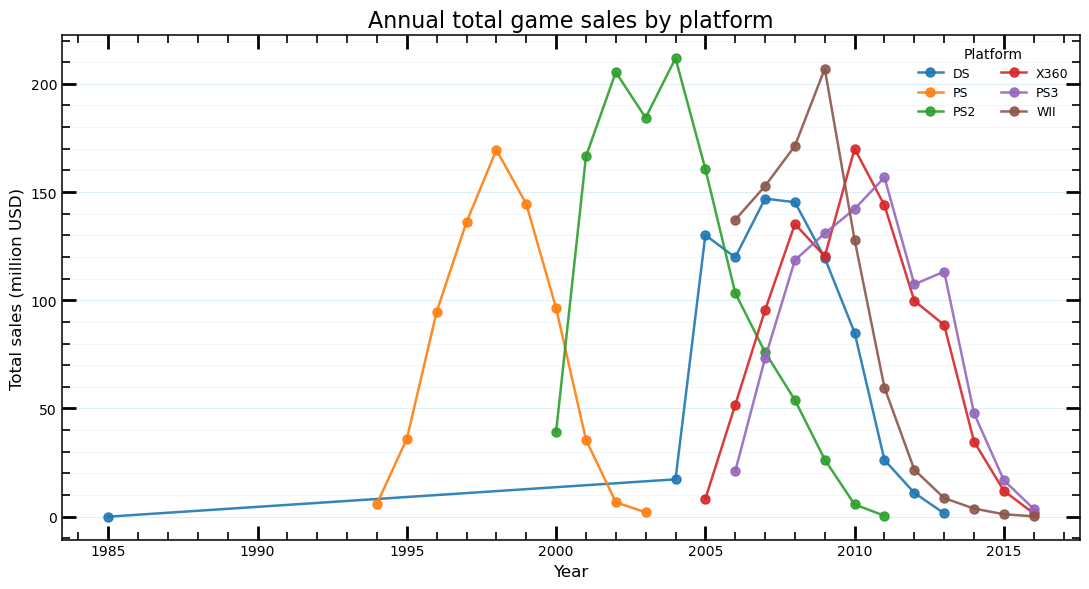

In [62]:
# Line plot to compare annual sales trends across the top-selling platforms
fig, ax = plt.subplots(figsize=(11, 6))

for platform in df_year_platform_sales['platform'].unique():
    data = df_year_platform_sales[df_year_platform_sales['platform'] == platform]

    ax.plot(
        data['year_of_release'],
        data['total_sales'],
        marker='o',
        linewidth=1.8,
        markersize=6.5,
        alpha=0.9,
        label=platform.upper()
    )

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total sales (million USD)', fontsize=12)
ax.set_title('Annual total game sales by platform', fontsize=16)

for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_linewidth(1.1)

ax.tick_params(labelsize=10)

# Subtle y-axis gridlines to aid trend comparison
ax.grid(axis='y', which='major', linewidth=0.8, alpha=0.28, color='#8EC7F0')
ax.grid(axis='y', which='minor', linewidth=0.5, alpha=0.20, color='#8EC7F0')

# Minor ticks improve readability of annual variations
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Apply shared tick styling helper for consistency
setup_minor_ticks(
    ax,
    x_minor_divisions=5,
    y_minor_divisions=5,
    major=(10, 2),
    minor=(6, 1.2),
    sides=dict(top=True, right=True, bottom=True, left=True),
    direction_top='in',
    direction_bottom='in',
    direction_left='in',
    direction_right='in'
)

# Legend configured for multi-series comparison
ax.legend(
    title='Platform',
    fontsize=9,
    title_fontsize=10,
    frameon=False,
    ncol=2
)

plt.tight_layout()
plt.show()

In [63]:
for platform, years in df_year_platform_sales.groupby('platform')['year_of_release']:
    print(f"Platform {platform.upper()}: {years.min()}–{years.max()}, duration: {years.max() - years.min()} years")

Platform DS: 1985–2013, duration: 28 years
Platform PS: 1994–2003, duration: 9 years
Platform PS2: 2000–2011, duration: 11 years
Platform PS3: 2006–2016, duration: 10 years
Platform WII: 2006–2016, duration: 10 years
Platform X360: 2005–2016, duration: 11 years


In [64]:
df_period_by_platform = df_games.groupby('platform')['year_of_release']

In [65]:
# Estimate the typical lifespan of gaming platforms based on their active years
period = []

for platform, years in df_period_by_platform:
    # Compute active duration as the span between first and last appearance
    time = years.max() - years.min()
    if time == 0:
        time = 1

    print(f"Platform {platform.upper()}: {years.min()}–{years.max()}, duration: {time} years")
    period.append(time)

print()
print(f"Average lifespan of gaming platforms: {np.round(np.mean(period), 2)} years.")

Platform 2600: 1980–1989, duration: 9 years
Platform 3DO: 1994–1995, duration: 1 years
Platform 3DS: 2011–2016, duration: 5 years
Platform DC: 1998–2008, duration: 10 years
Platform DS: 1985–2013, duration: 28 years
Platform GB: 1988–2001, duration: 13 years
Platform GBA: 2000–2007, duration: 7 years
Platform GC: 2001–2007, duration: 6 years
Platform GEN: 1990–1994, duration: 4 years
Platform GG: 1992–1992, duration: 1 years
Platform N64: 1996–2002, duration: 6 years
Platform NES: 1983–1994, duration: 11 years
Platform NG: 1993–1996, duration: 3 years
Platform PC: 1985–2016, duration: 31 years
Platform PCFX: 1996–1996, duration: 1 years
Platform PS: 1994–2003, duration: 9 years
Platform PS2: 2000–2011, duration: 11 years
Platform PS3: 2006–2016, duration: 10 years
Platform PS4: 2013–2016, duration: 3 years
Platform PSP: 2004–2015, duration: 11 years
Platform PSV: 2011–2016, duration: 5 years
Platform SAT: 1994–1999, duration: 5 years
Platform SCD: 1993–1994, duration: 1 years
Platform 

The six platforms that account for 62.95% of total global sales across all platforms are PS2, X360, PS3, Wii, DS, and PS. All sales figures in this section are expressed in million of USD. Their total sales are PS2 = 1,256, X360 = 971, PS3 = 940, Wii = 908, DS = 806, and PS = 731. This concentration can be observed in the "Total revenue by platform" chart.
The average total sales per platform in the dataset is 288 million of USD.

At the game level, the platforms with the highest average per title are GB and NES, with approximately 2.5 million of USD per game. This can be observed in the "Average revenue by platform" chart.

Focusing on the six platforms with the highest historical total sales (PS2, X360, PS3, Wii, DS, and PS, in descending order), the "Annual total game sales by platform" chart shows their yearly sales trajectories. Although these platforms generated substantial historical revenue, several of them (DS, PS, PS2) no longer generates sales, and others (PS3, Wii, X360) show a sustained decline over time.

Based on these trends, despite being the platforms with the highest historical total sales, they are not selected  as primary targets for marketing or promotional efforts in this project, as their current commercial relevance has declined.

The average commercial lifespan of gaming platform is approximately 8 years. However, there are notable exceptions. The DS platform generated revenue for about 28 years before becoming inactive in 2013, while PC has generated revenue for approximately 31 years and remains commercially active. In contrast, platforms such as 3DO, GG, PCFX, SCD, and TG16 had very shor lifespans, with sales activity lasting only one year.

### 3.3. Selection of relevant time period

In [66]:
def plot_platform_sales_window(df_games, active_year=2016, start_year=2010, end_year=2016):
    # Restrict the analysis to platforms that are present in a reference year
    active_platforms = df_games.loc[df_games['year_of_release'] == active_year, 'platform'].unique()

    # Aggregate yearly total sales for the selected platforms
    df_year_platform_sales = (
        df_games[df_games['platform'].isin(active_platforms)]
        .groupby(['year_of_release', 'platform'])['total_sales']
        .sum()
        .reset_index()
    )

    # Keep only the selected time window for comparison
    df_window = df_year_platform_sales.query('year_of_release >= @start_year and year_of_release <= @end_year')

    # Plot yearly sales trajectories per platform within the window
    fig, ax = plt.subplots(figsize=(12, 8))

    for platform, data in df_window.groupby('platform'):
        data = data.sort_values('year_of_release')
        ax.plot(
            data['year_of_release'],
            data['total_sales'],
            marker='o',
            linewidth=1.8,
            markersize=6.5,
            alpha=0.9,
            label=platform.upper()
        )

    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Total sales (million USD)', fontsize=12)
    ax.set_title(f'Annual total game sales by platform (active in {active_year})', fontsize=16)

    # Consistent axis framing and shared plot styling
    for side in ['top', 'right', 'bottom', 'left']:
        ax.spines[side].set_linewidth(1.1)

    ax.tick_params(labelsize=10)

    ax.grid(axis='y', which='major', linewidth=0.8, alpha=0.28, color='#8EC7F0')
    ax.grid(axis='y', which='minor', linewidth=0.5, alpha=0.20, color='#8EC7F0')
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    setup_minor_ticks(
        ax,
        x_minor_divisions=1,
        y_minor_divisions=5,
        major=(10, 2),
        minor=(6, 1.2),
        sides=dict(top=True, right=True, bottom=True, left=True),
        direction_top='in',
        direction_bottom='in',
        direction_left='in',
        direction_right='in'
    )

    # Keep your original xlim commented behavior
    # ax.set_xlim(start_year, end_year)

    ax.legend(
        title='Platform',
        fontsize=9,
        title_fontsize=10,
        frameon=False,
        ncol=2
    )

    plt.tight_layout()
    plt.show()

    return df_window


def platform_trend(df_window):
    # Compute a simple linear trend (slope) per platform within the selected window
    rows = []
    for platform, data in df_window.groupby('platform'):
        data = data.sort_values('year_of_release')
        x = data['year_of_release'].to_numpy()
        y = data['total_sales'].to_numpy()

        if len(x) < 2:
            slope = np.nan
        else:
            slope = np.polyfit(x, y, 1)[0]

        direction = 'increasing' if slope > 0 else ('decreasing' if slope < 0 else 'flat')
        rows.append({'platform': platform, 'slope_per_year': slope, 'trend': direction})

    return (pd.DataFrame(rows)
            .sort_values('slope_per_year', ascending=False)
            .reset_index(drop=True))

In [67]:
def interactive_platform_window(df_games, active_year=2016):
    # Derive the valid year bounds from the dataset to constrain widget inputs
    years = df_games['year_of_release'].dropna().astype(int)
    min_year = int(years.min())
    max_year = int(years.max())

    # UI controls for selecting the time window and reference "active" year
    start_slider = widgets.IntSlider(
        value=max(min_year, 2010),
        min=min_year,
        max=max_year - 1,
        step=1,
        description='Start year:',
        continuous_update=False
    )

    end_slider = widgets.IntSlider(
        value=min(max_year, 2016),
        min=min_year + 1,
        max=max_year,
        step=1,
        description='End year:',
        continuous_update=False
    )

    active_dropdown = widgets.Dropdown(
        options=sorted(years.unique()),
        value=active_year if active_year in set(years.unique()) else int(years.median()),
        description='Active year:'
    )

    out = widgets.Output()

    def _update(*args):
        # Keep a valid window by enforcing start < end
        if start_slider.value >= end_slider.value:
            start_slider.value = end_slider.value - 1

        # Re-render the plot and trend table on any control change
        with out:
            clear_output(wait=True)

            df_window = plot_platform_sales_window(
                df_games,
                active_year=active_dropdown.value,
                start_year=start_slider.value,
                end_year=end_slider.value
            )

            trend_df = platform_trend(df_window)
            display(trend_df)

    # Bind widget events to the shared update function
    start_slider.observe(_update, names='value')
    end_slider.observe(_update, names='value')
    active_dropdown.observe(_update, names='value')

    ui = widgets.VBox([widgets.HBox([active_dropdown, start_slider, end_slider]), out])
    display(ui)

    _update()  # initial render

In [68]:
interactive_platform_window(df_games, active_year=2016)

In [69]:
active_platforms_2016 = (
    df_games[df_games['year_of_release'] == 2016]['platform'].unique()
)
print(active_platforms_2016)

<StringArray>
['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'pc', 'x360', 'psv', 'wii']
Length: 9, dtype: str


To determine the time period used in this analysis, we consider the commercial lifespan of gaming platforms and the objective of building a model relevant for 2017. The average platform lifespan in the dataset is approximately 8 years. However, rather than including obsolete platforms, we restrict the analysis to a relevant and commercially active market. Therefore, we focus on data up to 2010, and only include platforms the remain active in 2016, specifically PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, and Wii. This ensures that the dataset reflects platforms that are still generating sales close to the target year, improving the relevance of the model predecting market behavior in 2017.

### 3.4. Global sales distribution across platforms

As shown in the interactive chart "Annual total game sales by platform (active in 2016)" using year = 2016, start year =  2010, and end year = 2015, and supported by the trend summary table below (with columns platform, slope_per_year, and trend), subsequent analyses focus only on platforms that meet specific relevance criteria.

First, platforms are requires to be active in 2016, ensuring market relevance  close to the target year of 2017. Second, a linear regression is fitted to annual total sales for each platform using data from 2010 to 2015. The year 2016 is excluded from the regression because  sales appear artificially low across all platforms, likely due to partial-year data, which would bias the slope estimates downward and distort tren interpretation. Using 2015 as the final year ensures that regression trends reflect complete and stable annual performance.

Based on the regression results, platforms with a positive sales trend are prioritized, specifically PS4 (slope = 46.46, increasing) and XOne (slope = 20.59, increasing). Platform with slopes close to zero, indicating near-stable performance, are also retained, including PSV (slope = −0.11, decreasing) and WiiU (slope = −0.33, decreasing).

Additionally, PC is included despite having a slightly negative slope (-4.43), because it is the only platform with continuous commercial activity since 1985. When evaluating a longer historical window (active year = 1985, start year = 1985, end year = 2015), PC shows a positive long-term slope (approximately 0.61), and the full-range trend suggests that the platform remains relatively stable and commercially viable over time.

In [70]:
year = 2010

In [71]:
df_since_year_2010 = df_games[df_games['year_of_release'] >= year]

In [72]:
possible_best_platforms = ['ps4', 'xone', 'psv', 'wiiu', 'pc']
df_possible_best_platforms = (df_games[(df_games['platform'].isin(possible_best_platforms)) & (df_games['year_of_release'] >= 2010)])

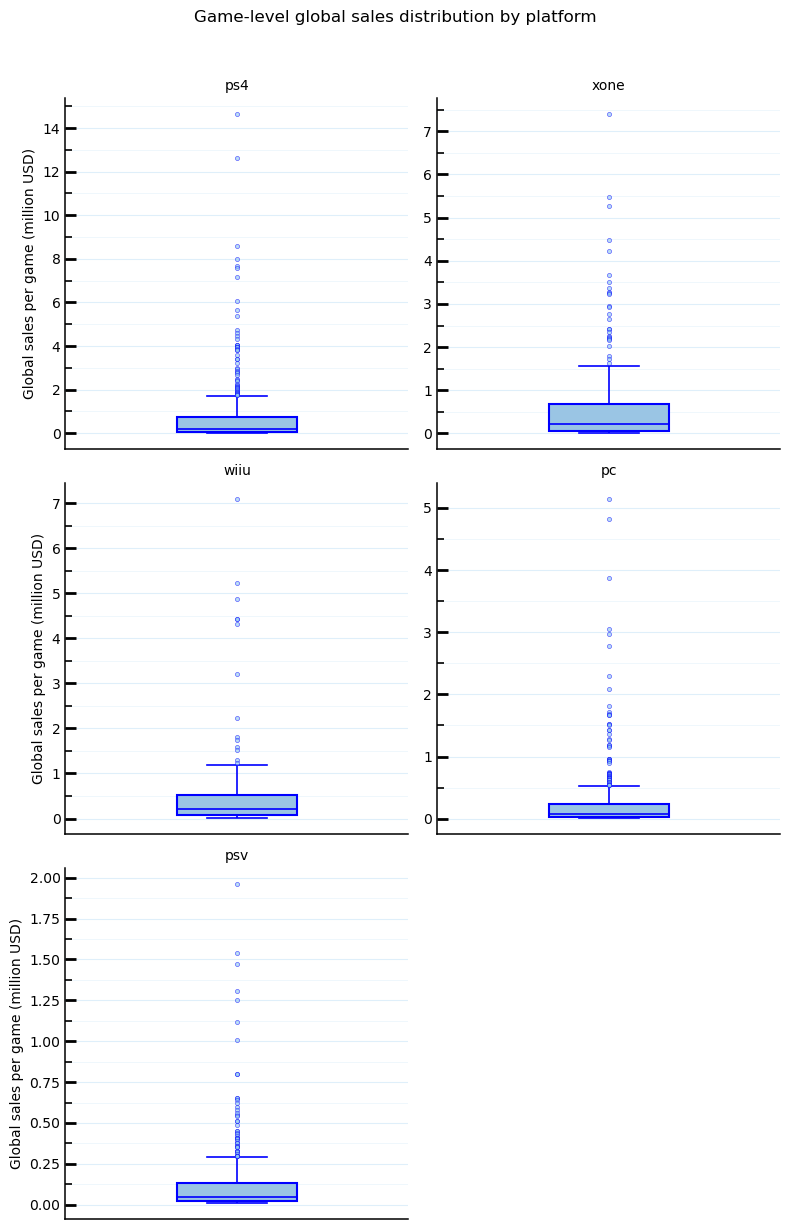

In [73]:
# Faceted boxplots to compare per-game sales distributions across platforms
g = sns.FacetGrid(
    df_possible_best_platforms,
    col="platform",
    col_wrap=2,
    height=4,
    sharey=False
)

g.map_dataframe(
    sns.boxplot,
    y="total_sales",
    width=0.35,
    color="#8EC7F0",
    linewidth=1.5,
    showfliers=True,
    boxprops=dict(edgecolor="blue"),
    whiskerprops=dict(color="blue", linewidth=1.2),
    capprops=dict(color="blue", linewidth=1.2),
    medianprops=dict(color="blue", linewidth=1.2),
    flierprops=dict(
        marker="o",
        markerfacecolor="#8EC7F0",
        markeredgecolor="blue",
        markersize=3,
        alpha=0.6,
        markeredgewidth=0.5
    )
)

# Titles and axis labels 
g.set_axis_labels("", "Global sales per game (million USD)")
g.set_titles("{col_name}")
g.fig.suptitle("Game-level global sales distribution by platform", y=1.02)

# Apply shared axis styling to each subplot for consistency
for ax in g.axes.flat:
    for side in ['top', 'right', 'bottom', 'left']:
        ax.spines[side].set_linewidth(1.1)

    ax.tick_params(labelsize=10)

    ax.grid(axis='y', which='major', linewidth=0.8, alpha=0.28, color='#8EC7F0')
    ax.grid(axis='y', which='minor', linewidth=0.5, alpha=0.20, color='#8EC7F0')

    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    setup_minor_ticks(
        ax,
        x_minor_divisions=2,
        y_minor_divisions=2,
        major=(8, 2),
        minor=(5, 1.2),
        sides=dict(top=False, right=False, bottom=False, left=True),
        direction_top='in',
        direction_bottom='in',
        direction_left='in',
        direction_right='in'
    )

plt.tight_layout()
plt.show()

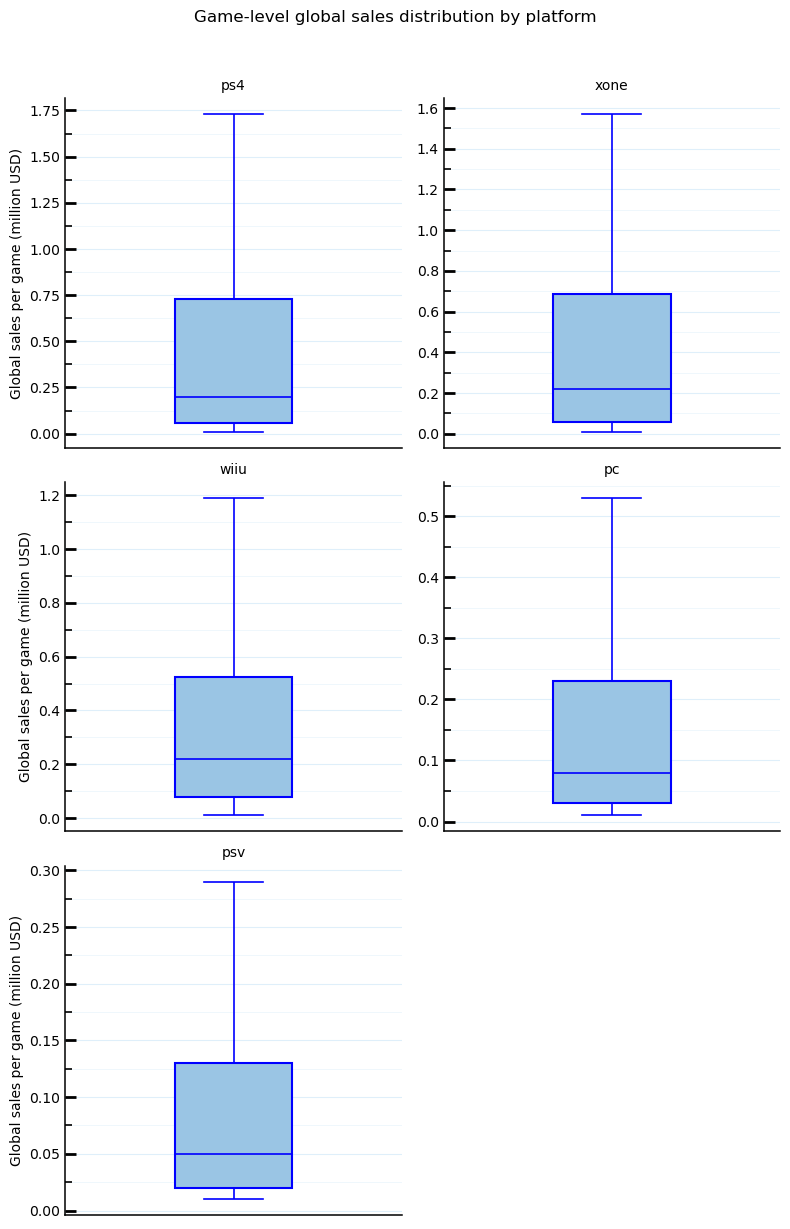

In [74]:
# Faceted boxplots to compare per-game sales distributions across platforms
g = sns.FacetGrid(
    df_possible_best_platforms,
    col="platform",
    col_wrap=2,
    height=4,
    sharey=False
)

# Use a consistent boxplot style across facets; hide fliers to reduce the impact of extreme outliers
g.map_dataframe(
    sns.boxplot,
    y="total_sales",
    width=0.35,
    color="#8EC7F0",
    linewidth=1.5,
    showfliers=False,
    boxprops=dict(edgecolor="blue"),
    whiskerprops=dict(color="blue", linewidth=1.2),
    capprops=dict(color="blue", linewidth=1.2),
    medianprops=dict(color="blue", linewidth=1.2),
    flierprops=dict(
        marker="o",
        markerfacecolor="#8EC7F0",
        markeredgecolor="blue",
        markersize=3,
        alpha=0.6,
        markeredgewidth=0.5
    )
)

# Titles and axis labels
g.set_axis_labels("", "Global sales per game (million USD)")
g.set_titles("{col_name}")
g.fig.suptitle("Game-level global sales distribution by platform", y=1.02)

# Apply shared axis styling to each subplot for consistency
for ax in g.axes.flat:
    for side in ['top', 'right', 'bottom', 'left']:
        ax.spines[side].set_linewidth(1.1)

    ax.tick_params(labelsize=10)

    ax.grid(axis='y', which='major', linewidth=0.8, alpha=0.28, color='#8EC7F0')
    ax.grid(axis='y', which='minor', linewidth=0.5, alpha=0.20, color='#8EC7F0')

    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    setup_minor_ticks(
        ax,
        x_minor_divisions=2,
        y_minor_divisions=2,
        major=(8, 2),
        minor=(5, 1.2),
        sides=dict(top=False, right=False, bottom=False, left=True),
        direction_top='in',
        direction_bottom='in',
        direction_left='in',
        direction_right='in'
    )

plt.tight_layout()
plt.show()

In [75]:
# Compute descriptive statistics of per-game sales for each platform
platform_stats = (
    df_possible_best_platforms
    .groupby('platform')['total_sales']
    .agg(
        count='count',
        sum='sum',
        mean='mean',
        std='std',
        min='min',
        q1=lambda x: x.quantile(0.25),
        median='median',
        q3=lambda x: x.quantile(0.75),
        max='max'
    )
)

display(platform_stats)

,count,sum,mean,std,min,q1,median,q3,max
platform,,,,,,,,,
pc,479,121.96,0.254614,0.530874,0.01,0.03,0.08,0.230,5.14
ps4,392,314.14,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
psv,429,53.81,0.125431,0.212341,0.01,0.02,0.05,0.130,1.96
wiiu,147,82.19,0.559116,1.058836,0.01,0.08,0.22,0.525,7.09
xone,247,159.32,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


In [76]:
# Compute descriptive statistics of per-game sales across all platforms
all_platform_stats = (
    df_games
    .groupby('platform')['total_sales']
    .agg(
        count='count',
        sum='sum',
        mean='mean',
        std='std',
        min='min',
        q1=lambda x: x.quantile(0.25),
        median='median',
        q3=lambda x: x.quantile(0.75),
        max='max'
    )
)
display(all_platform_stats.sample(5))

,count,sum,mean,std,min,q1,median,q3,max
platform,,,,,,,,,
xone,247,159.32,0.645020,1.036139,0.01,0.0600,0.22,0.685,7.39
snes,239,200.04,0.836987,1.869469,0.01,0.1350,0.32,0.705,20.62
gba,822,317.85,0.386679,0.896897,0.01,0.0525,0.16,0.390,15.84
gg,1,0.04,0.040000,NaN,0.04,0.0400,0.04,0.040,0.04
pc,974,259.52,0.266448,0.675577,0.01,0.0200,0.05,0.170,8.01


The boxplots show clear differences in the distribution of global sales per game across platforms during the 2010-2016 period. Sales distributions are highly skewed for all platforms, with a small number of games generating disproportionately high sales, which explains the large number of outliers observed. These outliers represent coomercially successfult titles and are not removed from the data.

Comparing central tendencies, PS4 has the highest median and mean sales per game, measured in millions of USD (median = 0.20, mean = 0.80), followed by XOne (median = 0.22, mean = 0.65) and WiiU (median = 0.22, mean = 0.56). In contrast, PC and PSV show substantially lower typical sales per game, with medians of 0.08 and 0.05 respectively, and means below 0.30.

The interquartile ranges indicate that PS4 and XOne not only achieve higher average sales per game, but also exhibit wider dispersion, reflecting a higher variability in game performance. PC and PSV display narrower interquartile ranges, suggesting more consistent but lower sales outcomes.

In [77]:
# Compute descriptive statistics for the highest-selling platforms only
top_seller_platforms = (
    df_games[df_games['platform'].isin(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'])]
    .groupby('platform')['total_sales']
    .agg(
        count='count',
        sum='sum',
        mean='mean',
        std='std',
        min='min',
        q1=lambda x: x.quantile(0.25),
        median='median',
        q3=lambda x: x.quantile(0.75),
        max='max'
    )
)
display(top_seller_platforms.sample(5))

,count,sum,mean,std,min,q1,median,q3,max
platform,,,,,,,,,
ps3,1330,939.65,0.706504,1.392152,0.00,0.11,0.27,0.7500,21.05
x360,1262,971.42,0.769746,1.615674,0.01,0.11,0.28,0.7575,21.82
ps2,2161,1255.77,0.581106,1.137927,0.00,0.08,0.23,0.5600,20.81
wii,1320,907.51,0.687508,3.126609,0.01,0.08,0.19,0.4825,82.54
ps,1197,730.86,0.610576,1.054502,0.01,0.11,0.26,0.6600,10.95


### 3.5 Review scores and sales relationship

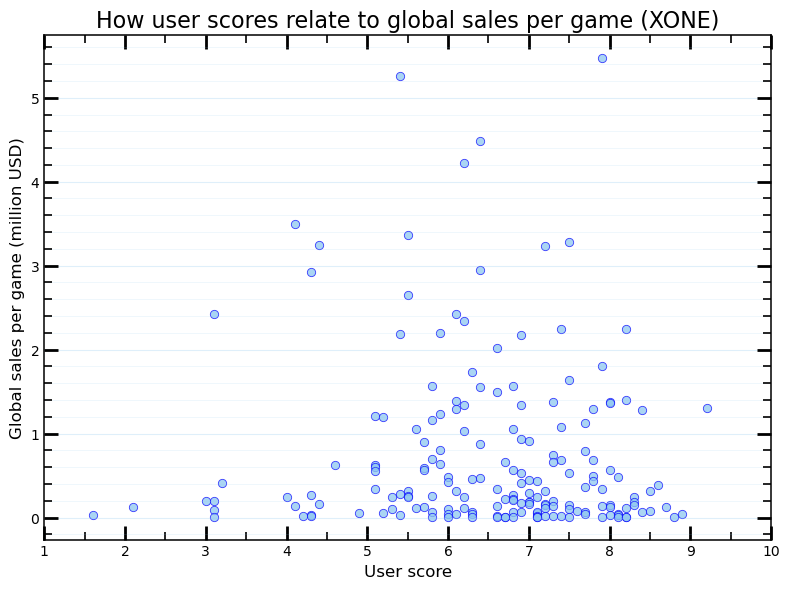

Pearson correlation between user score and global sales (million USD) for XONE: -0.069


In [78]:
# Focus the analysis on one platform and keep only valid score/sales pairs
platform_chosen = 'xone'
df_platform = df_possible_best_platforms[
    (df_possible_best_platforms['platform'] == platform_chosen) &
    (df_possible_best_platforms['user_score'].notna()) &
    (df_possible_best_platforms['total_sales'].notna())
]

# Scatterplot to inspect the relationship between user ratings and per-game sales
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    data=df_platform,
    x='user_score',
    y='total_sales',
    color='#8EC7F0',
    edgecolor='blue',
    linewidth=0.6,
    alpha=0.75,
    ax=ax
)

ax.set_xlabel('User score', fontsize=12)
ax.set_ylabel('Global sales per game (million USD)', fontsize=12)
ax.set_title(
    f'How user scores relate to global sales per game ({platform_chosen.upper()})',
    fontsize=16
)

# Apply the shared visual style used across figures
for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_linewidth(1.1)

ax.tick_params(labelsize=10)

ax.grid(axis='y', which='major', linewidth=0.8, alpha=0.28, color='#8EC7F0')
ax.grid(axis='y', which='minor', linewidth=0.5, alpha=0.20, color='#8EC7F0')

setup_minor_ticks(
    ax,
    x_minor_divisions=2,
    y_minor_divisions=5,
    major=(10, 2),
    minor=(6, 1.2),
    sides=dict(top=True, right=True, bottom=True, left=True),
    direction_top='in',
    direction_bottom='in',
    direction_left='in',
    direction_right='in'
)

# Standardize the x-axis to the 1–10 rating scale for easier interpretation
ax.set_xticks(range(0, 11, 1))
ax.set_xlim(1, 10)

plt.tight_layout()
plt.show()

# Quantify the linear association between user score and sales
pearson_corr = df_platform['user_score'].corr(
    df_platform['total_sales'],
    method='pearson'
)

print(
    f"Pearson correlation between user score and global sales "
    f"(million USD) for {platform_chosen.upper()}: {pearson_corr:.3f}"
)

In [79]:
# Compare sales across platforms using the same set of shared games (matched by canonical title)
base_platform = 'xone'
compare_platforms = ['ps4', 'psv', 'wiiu', 'pc']

# Build the reference set of game titles released on the base platform
xone_games = set(
    df_since_year_2010.loc[
        df_since_year_2010['platform'] == base_platform,
        'canonical_name'
    ]
)

# Filter the dataset to only those titles so platforms are compared on a common catalogue
df_same_games = df_since_year_2010[
    df_since_year_2010['canonical_name'].isin(xone_games)
]

# Pivot to align each game's sales side-by-side across platforms
pivot_sales = df_same_games.pivot_table(
    index='canonical_name',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

rows = []

# For each comparison platform, compute total sales over the shared titles only
for p in compare_platforms:
    if p not in pivot_sales.columns:
        continue

    pair = pivot_sales[[base_platform, p]].dropna()
    if len(pair) == 0:
        continue

    base_sales = pair[base_platform].sum()
    p_sales = pair[p].sum()

    rows.append({
        'comparison': f'{base_platform.upper()} vs {p.upper()}',
        'common_games': len(pair),
        'xone_sales_musd': round(base_sales, 2),
        'compared_platform': p.upper(),
        'compared_sales_musd': round(p_sales, 2),
        'sales_ratio_to_xone': round(p_sales / base_sales, 3)
    })

# Summary table of matched-catalog comparisons
df_comparisons_clean = pd.DataFrame(rows)
display(df_comparisons_clean)

,comparison,common_games,xone_sales_musd,compared_platform,compared_sales_musd,sales_ratio_to_xone
0,XONE vs PS4,217,129.36,PS4,256.35,1.982
1,XONE vs PSV,28,11.66,PSV,6.03,0.517
2,XONE vs WIIU,33,18.26,WIIU,12.40,0.679
3,XONE vs PC,108,100.78,PC,32.86,0.326


For XOne, the scatter plot shows a high dispersion of sales across all user score values. The Pearson correlation between user score and global sales per game is -0.069, indicating no meaningful linear relationship. Thi suggest that user reviews are not a strong predictor of sales performance on this platform.

When comparing the same games across platforms, clear differences appear. The 217 titles shared between XOne and PS4 generate nearly twice as much total sales on PS4 (sales ratio = 1.98). In contrast, the same games generate lower sales on PSV = 0.52, WiiU=0.68, and PC = 0.33 relative to XOne. These results indicate that platform-related factors have a stronger impact on sales outcomes than users scores alone.

### 3.6. Sales performance by genre

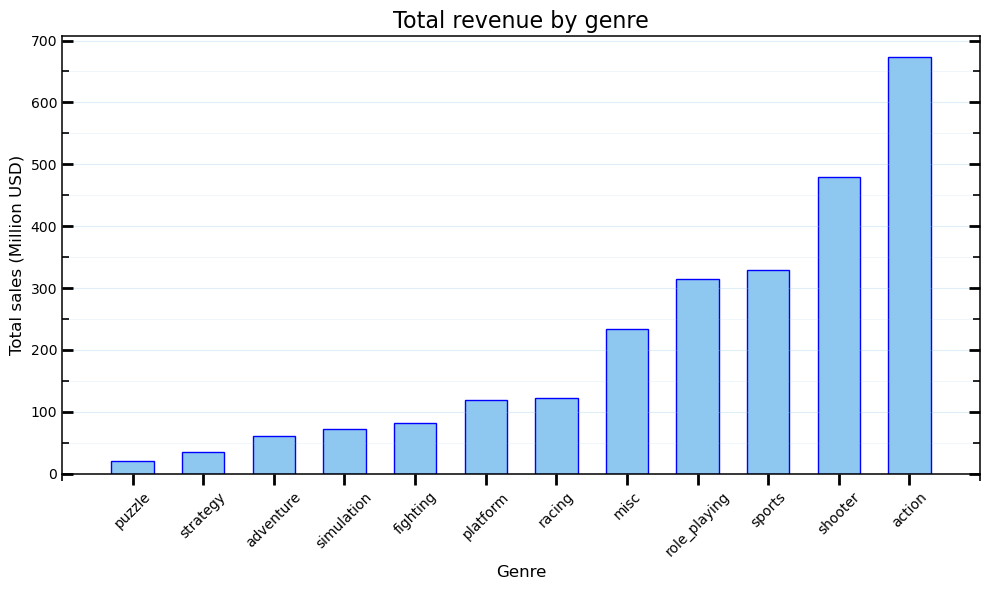

In [80]:
# Aggregate total sales by genre for the post-2010 market
series_total_sales_per_genre = (
    df_since_year_2010
    .groupby('genre')['total_sales']
    .sum()
    .sort_values()
)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(
    series_total_sales_per_genre.index,
    series_total_sales_per_genre.values,
    edgecolor='blue',
    width=0.6,
    linewidth=1.0,
    color='#8EC7F0',
    alpha=1
)

ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Total sales (Million USD)', fontsize=12)
ax.set_title('Total revenue by genre', fontsize=16)

# Apply the shared visual style used across figures
for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_linewidth(1.1)

ax.tick_params(labelsize=10)
ax.tick_params(axis='x', rotation=45)

ax.grid(axis='y', which='major', linewidth=0.8, alpha=0.28, color='#8EC7F0')
ax.grid(axis='y', which='minor', linewidth=0.5, alpha=0.20, color='#8EC7F0')

ax.yaxis.set_minor_locator(AutoMinorLocator(2))

setup_minor_ticks(
    ax,
    x_minor_divisions=1,
    y_minor_divisions=2,
    major=(8, 2),
    minor=(5, 1.2),
    sides=dict(top=False, right=True, bottom=True, left=True),
    direction_top='in',
    direction_bottom='out',
    direction_left='in',
    direction_right='in'
)

# Extend limits slightly to avoid clipping the outer bars
ax.set_xlim(-1, len(series_total_sales_per_genre))

plt.tight_layout()
plt.show()

In [81]:
print(series_total_sales_per_genre)

genre
puzzle           20.60
strategy         35.84
adventure        61.00
simulation       71.75
fighting         81.59
platform        119.72
racing          122.68
misc            234.56
role_playing    315.28
sports          328.39
shooter         479.74
action          673.09
Name: total_sales, dtype: float64


In [82]:
series_total_sales_per_genre.describe()

count     12.000000
mean     212.020000
std      202.854366
min       20.600000
25%       69.062500
50%      121.200000
75%      318.557500
max      673.090000
Name: total_sales, dtype: float64

Action is the highest-revenue genre (673 million USD), followed by Shooter (480 million USD), Sports (328 million USD), and Role-Playing (315 million USD), all above the third quartile (319 million USD). Puzzle (21 million USD), Strategy (36 million USD), and Adventure (61 million USD) fall below the first quartile (69 million USD).
Total sales are concentrated in small set of genres, with a clear gap between the top performers and the rest.

## 4. Regional market profiles and consumer preferences

### 4.1. Platform preferences by region

In [83]:
def plot_top_platforms_by_region(
    df,
    base_region='na_sales',
    regions=('na_sales', 'eu_sales', 'jp_sales'),
    top_n=5,
    title=None,
    figsize=(10, 7),
    annotate=True,
    annotate_region=None
):
    
    rename_map = {
        'na_sales': 'North America',
        'eu_sales': 'Europe',
        'jp_sales': 'Japan',
        'other_sales': 'Other Regions',
        'total_sales': 'Global'
    }

    # Rank platforms by the chosen base region to define a consistent top-N set
    base_sum = (
        df.groupby('platform')[base_region]
          .sum()
          .sort_values(ascending=False)
    )
    top_platforms = base_sum.head(top_n).index.tolist()

    # Build the comparison table across regions, restricted to the top-N platforms
    df_plot = (
        df[df['platform'].isin(top_platforms)]
        .groupby('platform')[list(regions)]
        .sum()
    )

    # Order bars by the base region for an interpretable left-to-right ranking
    df_plot = df_plot.sort_values(by=base_region, ascending=False)

    # Use readable region names in the legend
    df_plot = df_plot.rename(columns=rename_map)

    ax = df_plot.plot(
        kind='bar',
        figsize=figsize,
        width=0.82,
        edgecolor='black',
        linewidth=0.8,
        rot = 0
    )

    ax.set_xlabel('Platform')
    ax.set_ylabel('Sales (millions of USD)')

    for side in ['top', 'right', 'bottom', 'left']:
        ax.spines[side].set_linewidth(1.1)
    
    # Default title adds context (top-N + base region) instead of repeating axis labels
    if title is None:
        base_label = rename_map.get(base_region, base_region)
        title = f"Regional sales comparison for the top {top_n} platforms in {base_label}"

    ax.set_title(title, pad=12)

    ax.grid(axis='y', which='major', linestyle='--', linewidth=0.7, alpha=0.35)
    ax.grid(axis='y', which='minor', linestyle=':', linewidth=0.6, alpha=0.25)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    ax.legend(title='Region', frameon=False, ncol=min(3, df_plot.shape[1]))

    # Shared tick styling helper (keeps visuals consistent across figures)
    setup_minor_ticks(
        ax,
        x_minor_divisions=1,
        y_minor_divisions=2,
        major=(10, 1.6),
        minor=(6, 1.0),
        sides=dict(top=False, right=False, bottom=True, left=True),
        direction_bottom='out',
        direction_left='out'
    )

    plt.tight_layout()
    plt.show()

    return df_plot, top_platforms

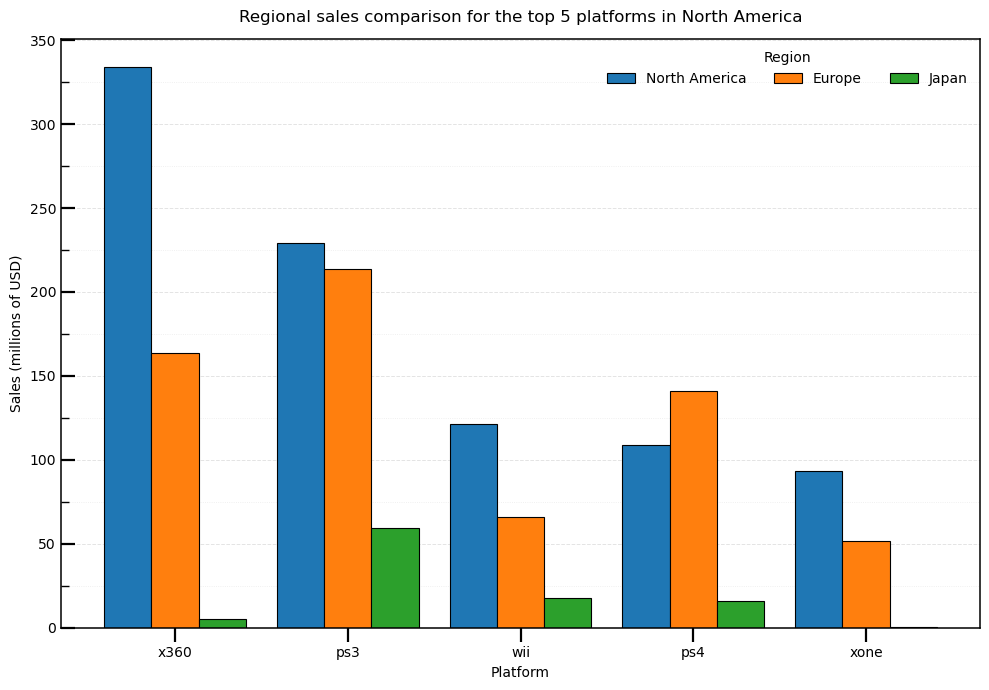

In [84]:
df_plot_na, top_na = plot_top_platforms_by_region(
    df_since_year_2010,
    base_region='na_sales'
)

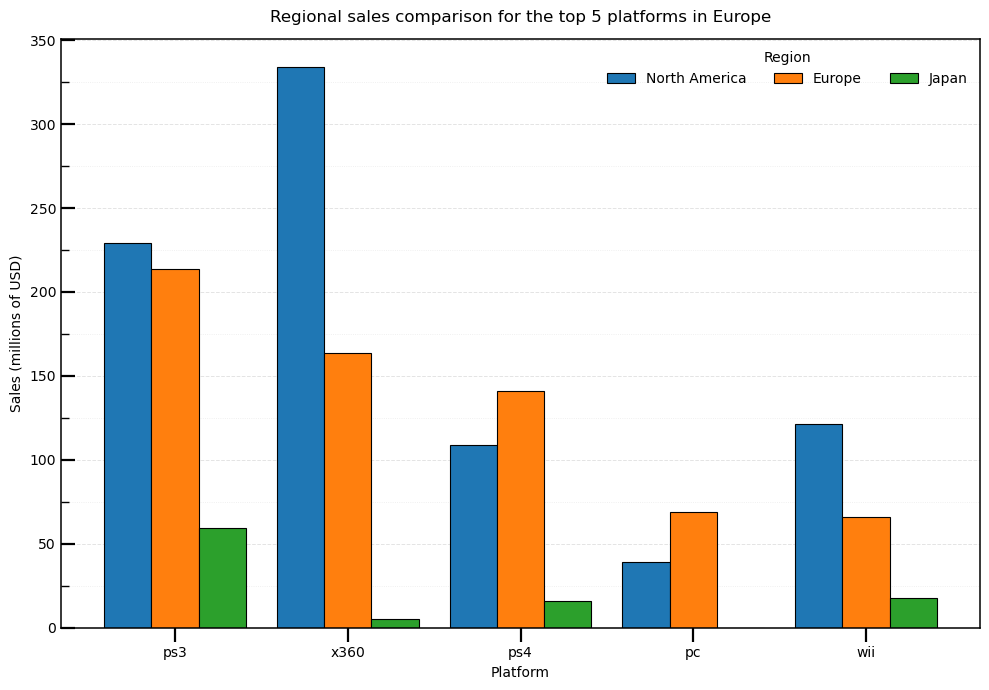

In [85]:
df_plot_na, top_na = plot_top_platforms_by_region(
    df_since_year_2010,
    base_region='eu_sales'
)

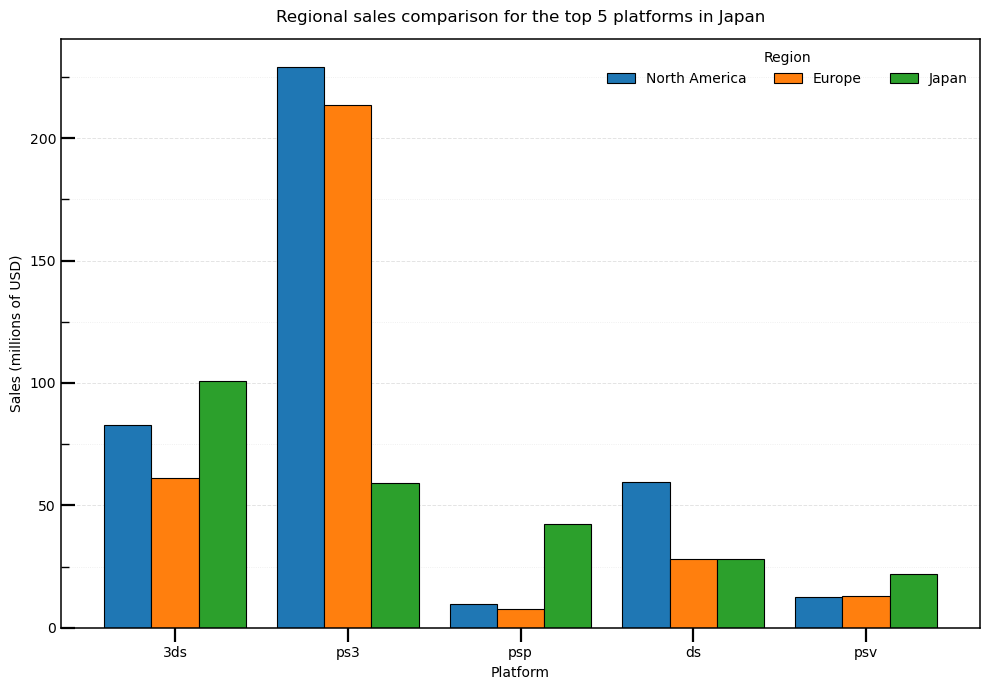

In [86]:
df_plot_na, top_na = plot_top_platforms_by_region(
    df_since_year_2010,
    base_region='jp_sales'
)

Among the top platforms, Xbox 360 and PlayStation 3 concentrate most of their sales in North America and Europe, with limited sales in Japan.
Nintendo platforms (3DS, PSP, and PSV) represent a larger share of sales in Japan than in North America and Europe.

PlayStation 4 shows higher sales in Europe, lower sales in North America, and reduced sales in Japan.
Sales patterns indicate that North America and Europe are dominated by Microsoft and Sony consoles, while Japan is dominated by Nintendo platforms.

### 4.2. Genre preferences by region

In [87]:
def plot_top_categories_by_region(
    df,
    category_col='genre',
    base_region='na_sales',
    regions=('na_sales', 'eu_sales', 'jp_sales'),
    top_n=5,
    title=None,
    figsize=(10, 7)
):
    
    rename_map = {
        'na_sales': 'North America',
        'eu_sales': 'Europe',
        'jp_sales': 'Japan',
        'other_sales': 'Other Regions',
        'total_sales': 'Global'
    }

    # Rank categories by the chosen base region to define the top-N set
    base_sum = (
        df.groupby(category_col)[base_region]
          .sum()
          .sort_values(ascending=False)
    )
    top_categories = base_sum.head(top_n).index.tolist()

    # Build the comparison table across regions, restricted to the top-N categories
    df_plot = (
        df[df[category_col].isin(top_categories)]
        .groupby(category_col)[list(regions)]
        .sum()
    )

    # Order bars by the base region for a consistent X-axis ranking
    df_plot = df_plot.sort_values(by=base_region, ascending=False)

    # Use readable region names in the legend
    df_plot = df_plot.rename(columns=rename_map)

    ax = df_plot.plot(
        kind='bar',
        figsize=figsize,
        width=0.82,
        edgecolor='black',
        linewidth=0.8,
        rot=0
    )

    ax.set_xlabel('Genre')
    ax.set_ylabel('Sales (millions of USD)')

    for side in ['top', 'right', 'bottom', 'left']:
        ax.spines[side].set_linewidth(1.1)

    # Default title encodes both the top-N criterion and the base region
    if title is None:
        base_label = rename_map.get(base_region, base_region)
        title = f"Regional sales comparison for the top {top_n} {category_col}s in {base_label}"

    ax.set_title(title, pad=12)

    ax.grid(axis='y', which='major', linestyle='--', linewidth=0.7, alpha=0.35)
    ax.grid(axis='y', which='minor', linestyle=':', linewidth=0.6, alpha=0.25)
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    ax.legend(title='Region', frameon=False, ncol=min(3, df_plot.shape[1]))

    # Shared tick styling helper to keep visuals consistent across plots
    setup_minor_ticks(
        ax,
        x_minor_divisions=1,
        y_minor_divisions=2,
        major=(10, 1.6),
        minor=(6, 1.0),
        sides=dict(top=False, right=False, bottom=True, left=True),
        direction_bottom='out',
        direction_left='out'
    )

    plt.tight_layout()
    plt.show()

    return df_plot, top_categories

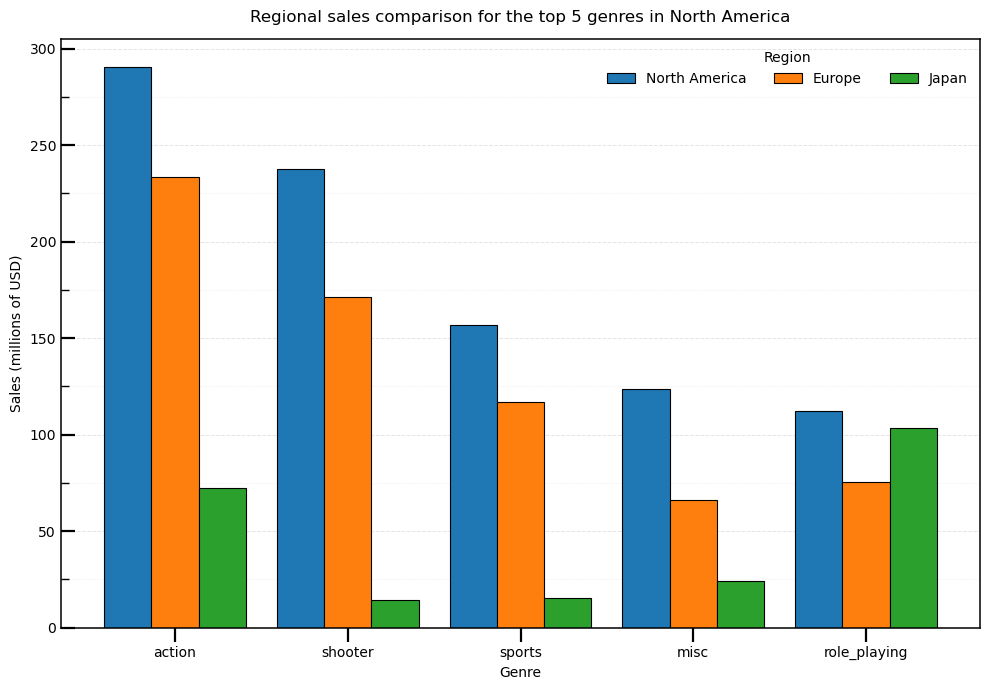

In [88]:
df_plot_genre_na, top_genres_na = plot_top_categories_by_region(
    df_since_year_2010,
    category_col='genre',
    base_region='na_sales',
    regions=('na_sales', 'eu_sales', 'jp_sales'),
    top_n=5
)

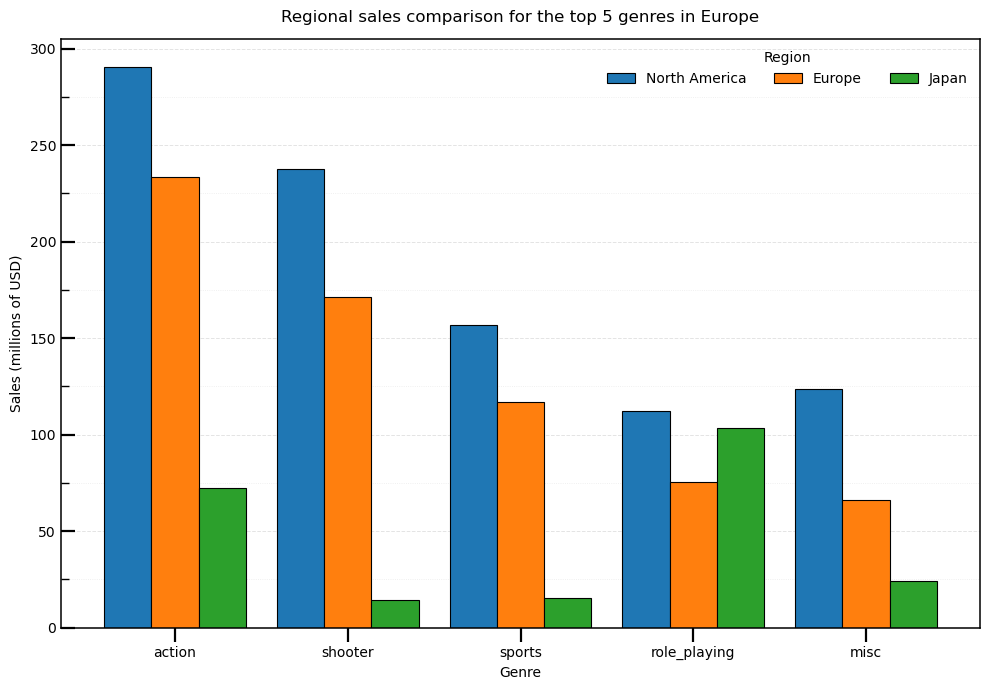

In [89]:
df_plot_genre_na, top_genres_na = plot_top_categories_by_region(
    df_since_year_2010,
    category_col='genre',
    base_region='eu_sales',
    regions=('na_sales', 'eu_sales', 'jp_sales'),
    top_n=5,
)

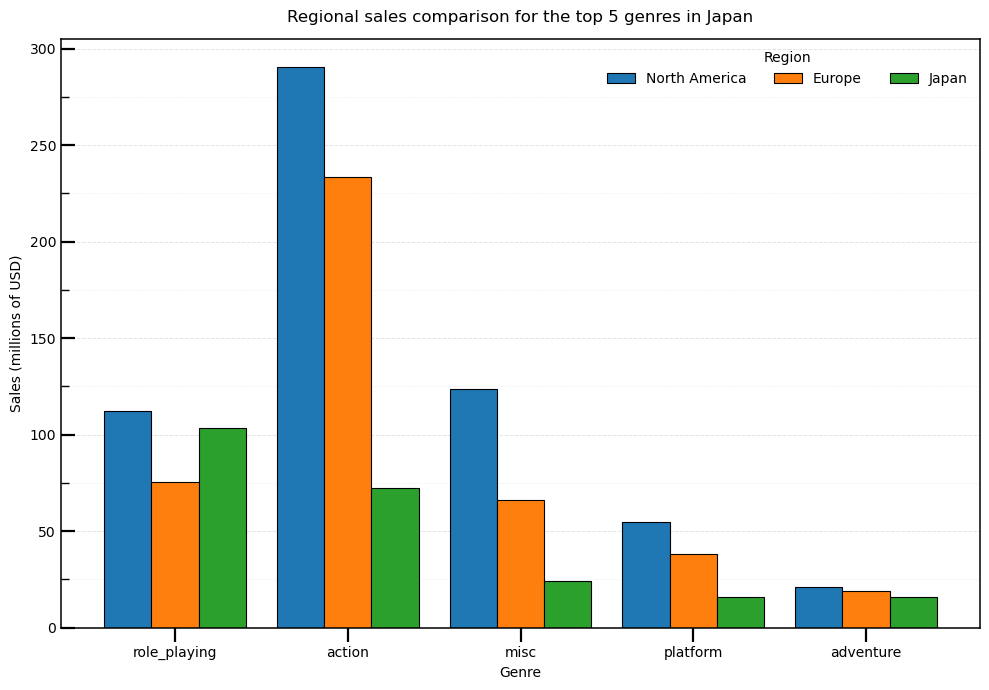

In [90]:
df_plot_genre_na, top_genres_na = plot_top_categories_by_region(
    df_since_year_2010,
    category_col='genre',
    base_region='jp_sales',
    regions=('na_sales', 'eu_sales', 'jp_sales'),
    top_n=5,
)

Among the top genres, action and shooter concentrate most of their sales in North America and Europe, with lower sales in Japan.
Role-playing appears among the top genres in Japan, but its sales in Japan are lower than in North America and Europe.
Action remains the highest-selling genre across all regions, including Japan, although its sales there are substantially lower than in Western regions.
Misc and platform genres show reduced sales in Japan compared to North America and Europe.
Overall, Japan exhibits lower absolute sales across genres, with a different ranking of top genres rather than higher regional dominance in any category.

### 4.3. Impact of ESRB ratings on regional sales

In [91]:
df_esrb_comparison = (
    df_since_year_2010[df_since_year_2010['rating'] != 'unknown']
    .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
    .sum()
    .sort_values(by='na_sales', ascending=False)
)

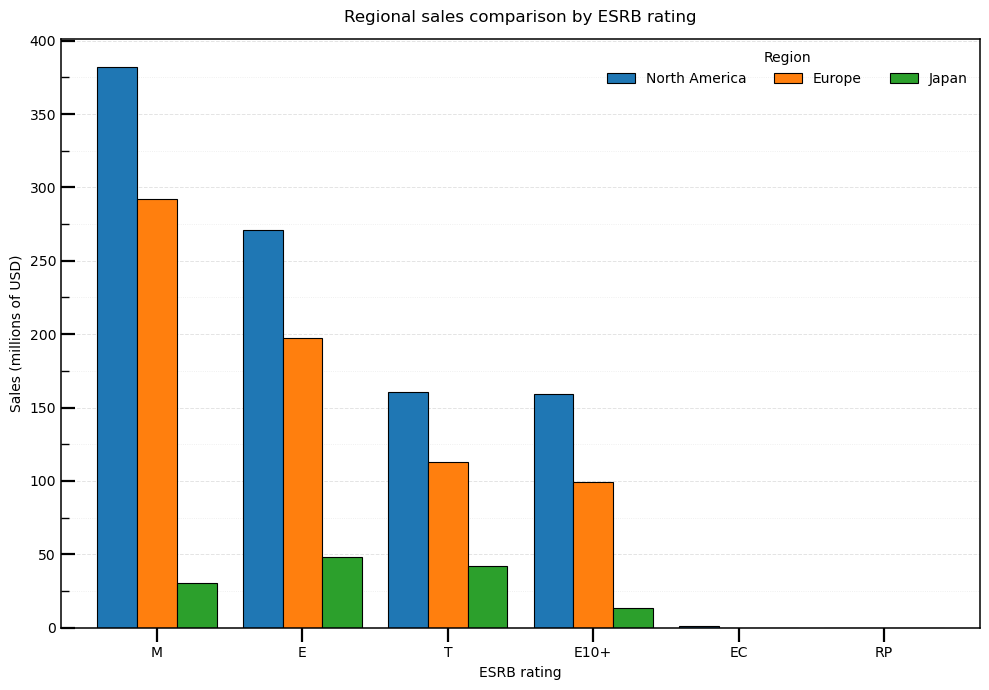

In [92]:
# Compare regional sales distribution across ESRB ratings
ax = (
    df_esrb_comparison
    .rename(columns={'na_sales': 'North America', 'eu_sales': 'Europe', 'jp_sales': 'Japan'})
    .plot(
        kind='bar',
        figsize=(10, 7),
        width=0.82,
        edgecolor='black',
        linewidth=0.8,
        rot=0
    )
)

ax.set_xlabel('ESRB rating')
ax.set_ylabel('Sales (millions of USD)')

ax.set_title('Regional sales comparison by ESRB rating', pad=12)

for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_linewidth(1.1)

ax.grid(axis='y', which='major', linestyle='--', linewidth=0.7, alpha=0.35)
ax.grid(axis='y', which='minor', linestyle=':', linewidth=0.6, alpha=0.25)
ax.set_axisbelow(True)

ax.legend(title='Region', frameon=False, ncol=3)

# Shared tick styling for consistency with other regional plots
setup_minor_ticks(
    ax,
    x_minor_divisions=1,
    y_minor_divisions=2,
    major=(10, 1.6),
    minor=(6, 1.0),
    sides=dict(top=False, right=False, bottom=True, left=True),
    direction_bottom='out',
    direction_left='out'
)

plt.tight_layout()
plt.show()

In [93]:
df_share = df_esrb_comparison.div(df_esrb_comparison.sum())
df_share

,na_sales,eu_sales,jp_sales
rating,,,
M,0.392145,0.416148,0.227834
E,0.278191,0.281203,0.358174
T,0.164986,0.161135,0.315077
E10+,0.163519,0.141471,0.098915
EC,0.001159,0.000000,0.000000
RP,0.000000,0.000043,0.000000


The ESRB rating (E: Everyone, E10+: Everyone 10 and older, T: Teen, M: Mature) is associated with sales patterns within each region. In North America and Europe, games rated M and E account for the highest sales, while games rated T and E10+ occupy a secondary position. In Japan, absolute sales are lower across all ESRB categories, and the distribution is more concentrated in the E and T ratings, with games rated M contributing a smaller share than in Western regions.

These patterns are consistent with the platform and genre analyses: North America and Europe favor action and shooter dominated markets on home consoles, which aligns with higher sales of games rated M, whereas Japan’s market structure, driven more by Nintendo platforms and role playing genres, corresponds to a stronger presence of less restrictive age ratings.

## 5. Hypothesis testing on user ratings

### 5.1. Hypothesis 1 - comparison of average user ratings between Xbox One and PC

Null hypothesis (H_0):
The average user score for Xbox One and PC platforms are the same.

Alternative hypothesis (H_1):
The avergae user score for Xbox One and PC plaatforms are different.

In [94]:
xone = df_since_year_2010[df_since_year_2010['platform'] == 'xone']['user_score'].dropna()
pc = df_since_year_2010[df_since_year_2010['platform'] == 'pc']['user_score'].dropna()

In [95]:
# Significance level for the hypothesis test
alpha = 0.05

# Welch’s t-test to compare mean user scores between platforms
t_stat, p_value = stats.ttest_ind(xone, pc, equal_var=False)

# Decision based on the p-value
if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

print(p_value)

We fail to reject the null hypothesis
0.9801634129117882


At a significance level of 0.05, we fail to reject the null hypothesis. There is no statistically significant evidence that average scores differ between Xbox One and PC platforms.

### 5.2. Hypothesis 2 - comparison of average user ratings between Action and Sports genres

Null hypothesis (H_0):
The average user scores for action and sports games are the same.

Alternative hypothesis (H_1):
The average user scores for actions and sports games are different.

In [96]:
action = df_since_year_2010[df_since_year_2010['genre'] == 'action']['user_score'].dropna()
sports = df_since_year_2010[df_since_year_2010['genre'] == 'sports']['user_score'].dropna()

In [97]:
# Significance level for the hypothesis test
alpha = 0.05

# Welch’s t-test to compare mean user scores between genres
t_stat, p_value = stats.ttest_ind(action, sports, equal_var=False)

# Decision based on the p-value
if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

print(p_value)

We reject the null hypothesis
1.857755891938523e-15


At a significance level of 0.05, we reject the null hypothesis. The extremely low p-value indicates a statistically significant difference in average user scores between action and sports games.

## 6. Overall conclusions and recommendations for 2017

Based on historical sales patterns, platform lifecycles, genre performance, regional preferences, and statistical testing, the data indicates that marketing and investment efforts for 2017 should be highly selective rather than broad.

From a platform perspective, PlayStation 4 and Xbox One are the primary investment targets. Both platforms show positive sales trends leading into 2016, higher median and average sales per game, and greater upside potential despite higher variability. PC should be treated as a secondary, stable platform, suitable for long-term presence but not as a main driver of short-term growth. Platforms such as PS3, Xbox 360, Wii, and DS, while historically dominant, should not receive marketing investment due to their declining or inactive commercial status.

From a genre standpoint, Action is the strongest and most reliable driver of revenue, followed by Shooter, Sports, and Role-playing. Sales are highly concentrated in these genres, while Puzzle, Strategy, and Adventure consistently underperform and should not be prioritized unless supported by exceptional titles.

Regional analysis suggests distinct market strategies. North America and Europe should be targeted with Action and Shooter titles on PS4 and Xbox One, where sales volume and Mature-rated content perform strongly. Japan requires a different approach, favoring Nintendo platforms and role-playing titles, with less emphasis on Mature-rated games and lower overall sales expectations.

User and critic review scores are not reliable predictors of commercial success, as no meaningful relationship between review scores and sales was found at the platform level. Consequently, marketing decisions should prioritize platform, genre, and regional fit over review scores.